In [1]:
import numpy as np
# import skimage.data as skd
from skimage import io
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
def compute_error(original, compressed, rows, cols):
    # compressed = np.clip(compressed.astype('uint8'), 0, 255)
    # #Reshape the image to original dimension
    original = original.reshape(rows, cols, -1)
    compressed = compressed.reshape(rows, cols, -1)

    channels = compressed.shape[-1]

    # Compute PSNR
    psnr_val = psnr(original, compressed)
    print("PSNR:", psnr_val)

    # Compute SSIM
    ssim_val = ssim(original, compressed, channel_axis=2)
    print("SSIM:", ssim_val)

    fig, axs = plt.subplots(1, 2)

    axs[0].axis('off')
    axs[0].set_title('Original image')
    if channels > 1:
        axs[0].imshow(original)
    else:
        axs[0].imshow(original, cmap='gray', vmin=0, vmax=255)

    axs[1].axis('off')
    axs[1].set_title('Blurred image')
    if channels > 1:
        axs[1].imshow(compressed)
    else:
        axs[1].imshow(compressed, cmap='gray', vmin=0, vmax=255)
    
    plt.show()



#### CAMERA ####

### Float ###
PSNR: 25.089057600775426
SSIM: 0.7178242221099561


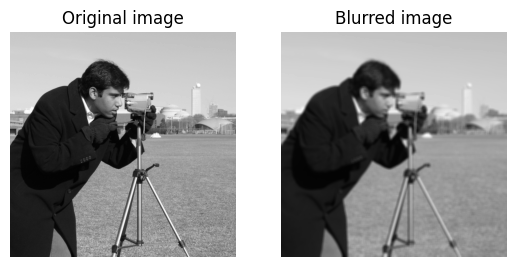


### Posit ###
PSNR: 25.089057600775426
SSIM: 0.7178242221099561


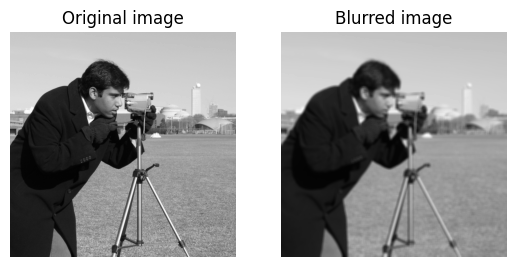


### Log Approx Posit ###
PSNR: 23.476513681818503
SSIM: 0.7207222249852486


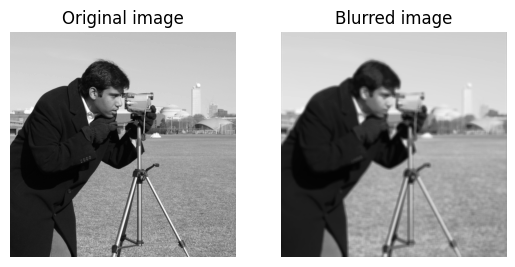



#### LENNA ####

### Float ###
PSNR: 27.431304188112282
SSIM: 0.7475206336657839


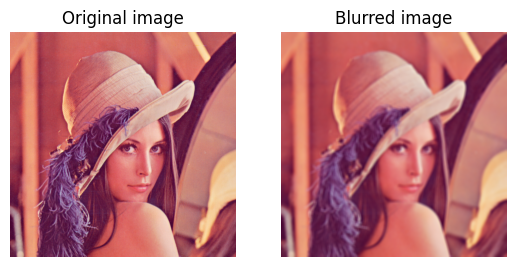


### Posit ###
PSNR: 27.431304188112282
SSIM: 0.7475206336657839


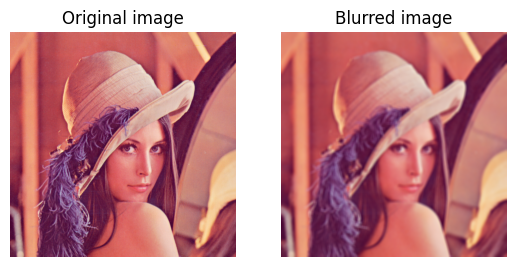


### Log Approx Posit ###
PSNR: 25.48294820736495
SSIM: 0.740625421570722


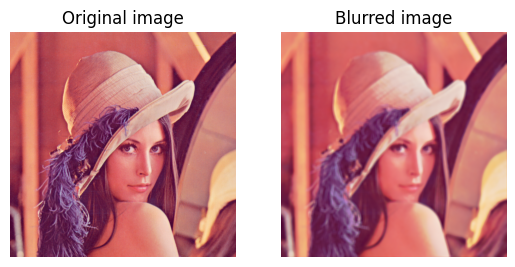



#### PEPPERS ####

### Float ###
PSNR: 26.361768482503898
SSIM: 0.7351861758066097


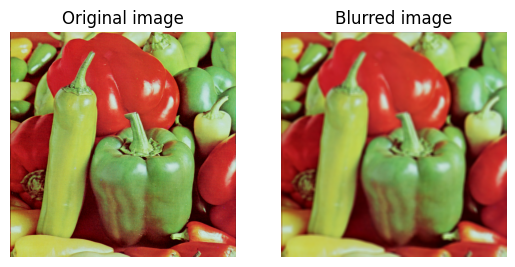


### Posit ###
PSNR: 26.361768482503898
SSIM: 0.7351861758066097


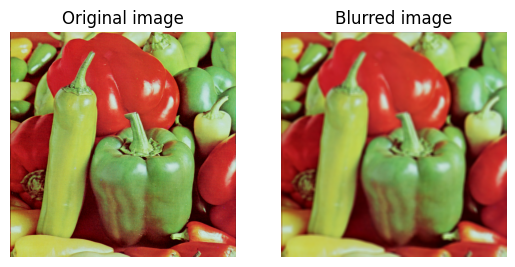


### Log Approx Posit ###
PSNR: 24.571875905615947
SSIM: 0.7304472461112649


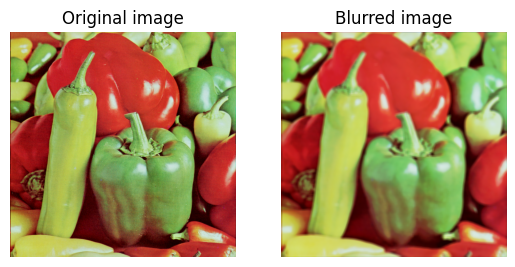



#### BABOON ####

### Float ###
PSNR: 20.05882726538968
SSIM: 0.38687534760840553


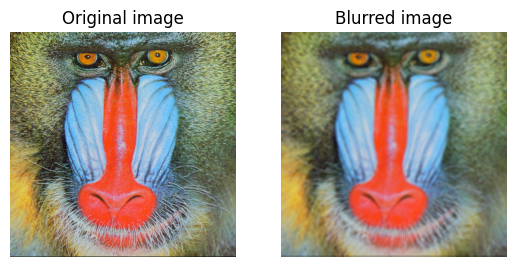


### Posit ###
PSNR: 20.05882726538968
SSIM: 0.38687534760840553


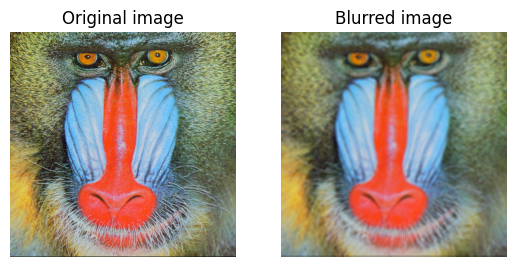


### Log Approx Posit ###
PSNR: 19.611710562514823
SSIM: 0.3906355711879857


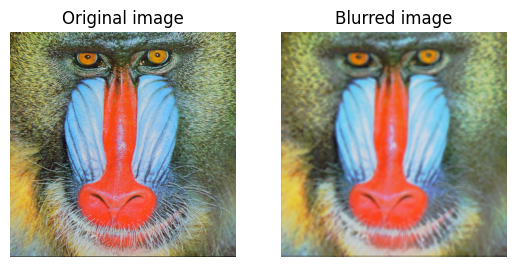

In [4]:
def compare_err(pic):
    print('\n\n#### '+pic.upper()+' ####')

    img = io.imread('imgs/'+pic+'.png')
    rows, cols = img.shape[:2]

    # float
    print('\n### Float ###')
    blurred = io.imread('imgs/'+pic+'_blurred.png')
    compute_error(img, blurred, rows, cols)

    # posit
    print('\n### Posit ###')
    blurred = io.imread('imgs/'+pic+'_blurred_posit.png')
    compute_error(img, blurred, rows, cols)

    # log approx posit
    print('\n### Log Approx Posit ###')
    blurred = io.imread('imgs/'+pic+'_blurred_approx.png')
    compute_error(img, blurred, rows, cols)

    # ANOTHER log approx posit
    print('\n### ANOTHER Log Approx Posit ###')
    blurred_exact = io.imread('imgs/'+pic+'_blurred_posit.png')
    blurred_approx = io.imread('imgs/'+pic+'_blurred_approx.png')
    compute_error(blurred_exact, blurred_approx, rows, cols)

for pic in ['camera','lenna','peppers','baboon']:
    compare_err(pic)